In [178]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches 
from tikzplotlib import save as savetikz

In [232]:
a1 = 2
a2 = 1
d = 0.5

d1 = a1**2-a2**2+d**2
d2 = a1**2-a2**2-d**2

d1,d2

c = d1**2-a1**2
c = np.sqrt(d2**2-a2**2)
c

2.5617376914898995

In [233]:
x = np.linspace(0,8,100)
y = np.linspace(-3,3,100)
X1, Y1 = np.meshgrid(x,y)
a1, a2 = (2,1)
d = 0.5

d1 = a1**2-a2**2+d**2
d2 = a1**2-a2**2-d**2
c = np.sqrt(d2**2-a2**2)




(0.0, 8.0, -3.0, 3.0)

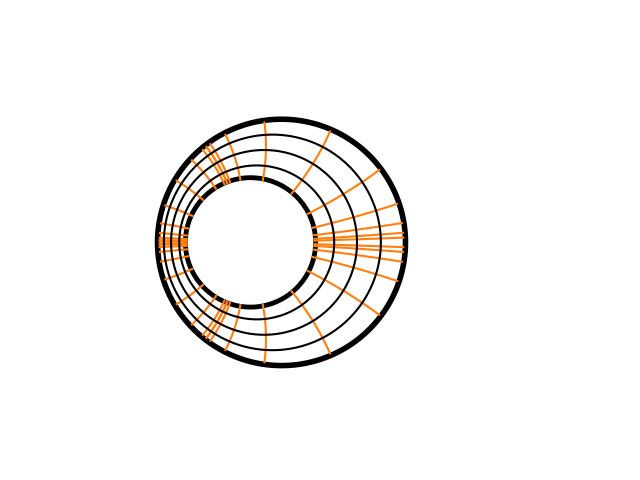

In [234]:
#v=cte
V1 = (X1-d1)**2+Y1**2-(d1**2-c**2)
V2 = (X1-d2)**2+Y1**2-(d2**2-c**2)
niv1 = np.linspace(0,1,1)
niv2 = np.linspace(0,1,1)


circulo2 = patches.Circle((d1,0),radius=a1,fc='none')
circulo1 = patches.Circle((d2,0),radius=a2,color='white',zorder=5)

fig,ax = plt.subplots()

#isotermas

cont1 = ax.contour(X1,Y1,V1,colors='black',levels=niv1,linewidths=4)
cont2 = ax.contour(X1,Y1,V2,colors='black',levels=niv2,linewidths=8)
col1 = cont1.collections[0]
clip_path = col1.get_paths()[0]
#isoflujo
for theta in np.linspace(0.,np.pi,10):
    di = np.sinh(theta)**2
    
    nivc = np.linspace(0,10,1)
    
    Ui1 = X1**2+(Y1-di)**2-(di**2+c**2)
    Ui2 = X1**2+(Y1+di)**2-(di**2+c**2)
    cont_a = ax.contour(X1,Y1,Ui1,levels=nivc,colors='tab:orange')
    cont_b = ax.contour(X1,Y1,Ui2,levels=nivc,colors='tab:orange')
    for conti in cont_a.collections:
        conti.set_clip_path(clip_path,col1.get_transform())
    for conti in cont_b.collections:
        conti.set_clip_path(clip_path,col1.get_transform())



for ai in np.linspace(a1,a2,5):
    di = np.sqrt(c**2+ai**2)
    Vi = (X1-di)**2+Y1**2-(di**2-c**2)
    Uix,Uiy = np.gradient(Vi)
    Ui1 = Uix**2+Uiy**2
    cont = ax.contour(X1,Y1,Vi,colors='black',levels=niv1)

    
    
    

ax.add_patch(circulo1)

ax.axis('off')   
    
#savetikz('/home/juan/Documents/Ensenanza/latex/apuntes/conduccion1D/Factores de forma/cilindros_excentricos1.tikz')
    

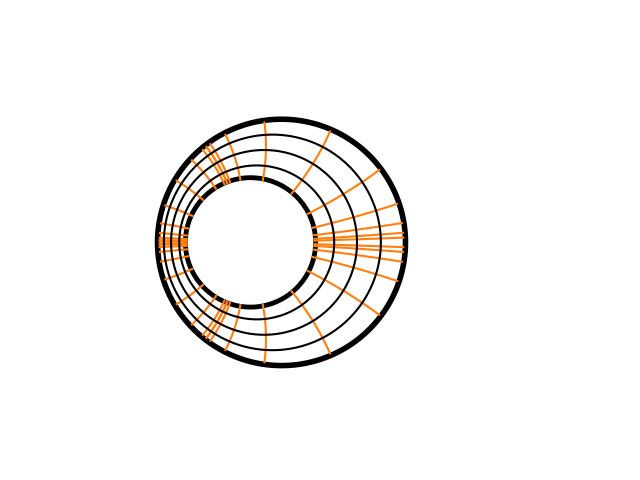

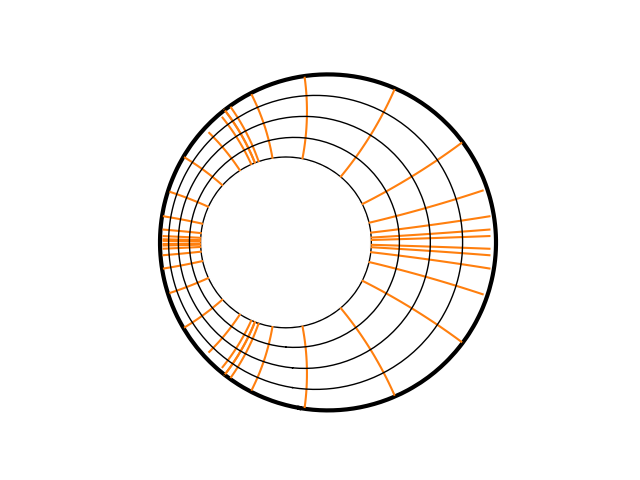

In [256]:
#v=cte
V1 = (X1-d1)**2+Y1**2-(d1**2-c**2)
V2 = (X1-d2)**2+Y1**2-(d2**2-c**2)
niv1 = np.linspace(0,1,1)
niv2 = np.linspace(0,1,1)


circulo2 = patches.Circle((d1,0),radius=a1,fc='none')
circulo1 = patches.Circle((d2,0),radius=a2,color='white',zorder=5)
circulo1b = patches.Circle((d2,0),radius=a2,color='white',zorder=5)

fig,ax = plt.subplots()
fig1,ax1 = plt.subplots()

#isotermas

cont1 = ax.contour(X1,Y1,V1,colors='black',levels=niv1,linewidths=4)
cont2 = ax.contour(X1,Y1,V2,colors='black',levels=niv2,linewidths=8)

for conti in [cont1,cont2]:
    p = conti.collections[0].get_paths()[0]
    v = p.vertices
    x1 = v[:,0]
    y1 = v[:,1]  

    ax1.plot(x1,y1,'k',linewidth=3)


col1 = cont1.collections[0]
clip_path = col1.get_paths()[0]
#isoflujo
for theta in np.linspace(0.,np.pi,10):
    di = np.sinh(theta)**2
    
    nivc = np.linspace(0,10,1)
    
    Ui1 = X1**2+(Y1-di)**2-(di**2+c**2)
    Ui2 = X1**2+(Y1+di)**2-(di**2+c**2)
    cont_a = ax.contour(X1,Y1,Ui1,levels=nivc,colors='tab:orange')
    cont_b = ax.contour(X1,Y1,Ui2,levels=nivc,colors='tab:orange')
    for conti in cont_a.collections:
        conti.set_clip_path(clip_path,col1.get_transform())
    for conti in cont_b.collections:
        conti.set_clip_path(clip_path,col1.get_transform())
    
    
    for conti in [cont_a,cont_b]:
        p = conti.collections[0].get_paths()[0]
        v = np.copy(p.vertices)
        x2 = v[:,0]
        y2 = v[:,1]
        
        
        condicion1 = (x2-d1)**2+y2**2-(d1**2-c**2)>0
        condicion2 = (x2-d2)**2+y2**2-(d2**2-c**2)<0
        x2[np.logical_or(condicion1,condicion1)] = 1e3
        y2[np.logical_or(condicion1,condicion1)] = 1e3
        
        x2 = np.delete(x2,x2==1e3)
        y2 = np.delete(y2,y2==1e3)
        
        ax1.plot(x2,y2,color='tab:orange')



for ai in np.linspace(a1,a2,5):
    di = np.sqrt(c**2+ai**2)
    Vi = (X1-di)**2+Y1**2-(di**2-c**2)
    Uix,Uiy = np.gradient(Vi)
    Ui1 = Uix**2+Uiy**2
    cont = ax.contour(X1,Y1,Vi,colors='black',levels=niv1)
    for conti in [cont]:
        p = conti.collections[0].get_paths()[0]
        v = np.copy(p.vertices)
        x1 = v[:,0]
        y1 = v[:,1]  
        ax1.plot(x1,y1,'k',linewidth=1)

    
    
    

ax.add_patch(circulo1)
ax1.add_patch(circulo1b)
ax1.axis('off')
ax.axis('off')   
ax1.axis('equal')
    
#savetikz('/home/juan/Documents/Ensenanza/latex/apuntes/conduccion1D/Factores de forma/cilindros_excentricos1.tikz')
   
plt.sca(ax1)    
savetikz('/home/juan/Documents/Ensenanza/latex/apuntes/conduccion1D/Factores de forma/cilindros_excentricos1.tikz')
    

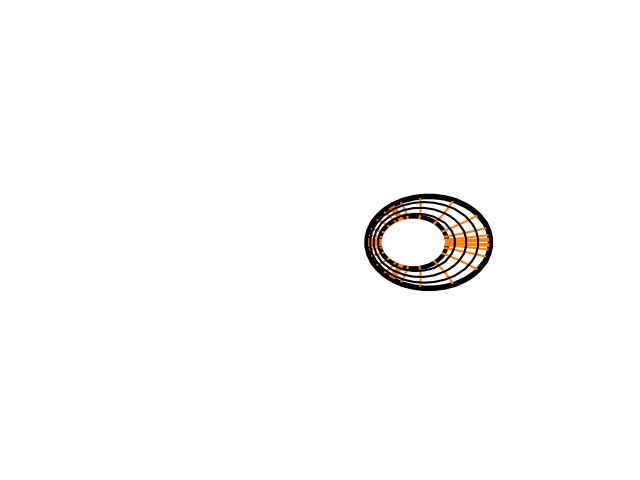

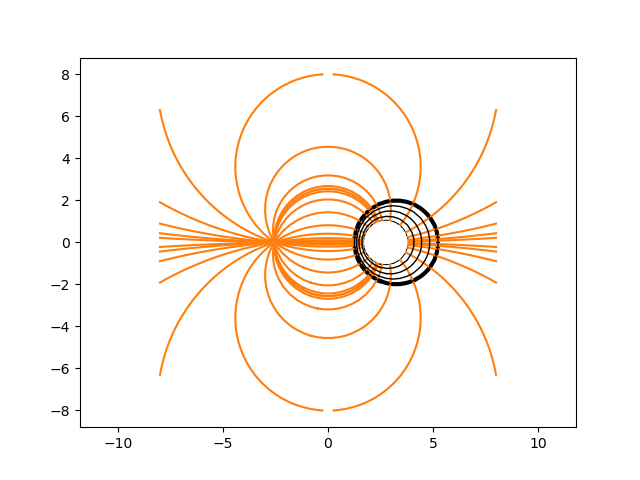

In [262]:
x = np.linspace(-8,8,50)
y = np.linspace(-8,8,50)
X1, Y1 = np.meshgrid(x,y)
a1, a2 = (2,1)
d = 0.5

d1 = a1**2-a2**2+d**2
d2 = a1**2-a2**2-d**2
c = np.sqrt(d2**2-a2**2)
#v=cte
V1 = (X1-d1)**2+Y1**2-(d1**2-c**2)
V2 = (X1-d2)**2+Y1**2-(d2**2-c**2)
niv1 = np.linspace(0,1,1)
niv2 = np.linspace(0,1,1)


circulo2 = patches.Circle((d1,0),radius=a1,fc='none')
circulo1 = patches.Circle((d2,0),radius=a2,color='white',zorder=5)
circulo1b = patches.Circle((d2,0),radius=a2,color='white',zorder=5)

fig,ax = plt.subplots()
fig1,ax1 = plt.subplots()

#isotermas

cont1 = ax.contour(X1,Y1,V1,colors='black',levels=niv1,linewidths=4)
cont2 = ax.contour(X1,Y1,V2,colors='black',levels=niv2,linewidths=8)

for conti in [cont1,cont2]:
    p = conti.collections[0].get_paths()[0]
    v = p.vertices
    x1 = v[:,0]
    y1 = v[:,1]  

    ax1.plot(x1,y1,'k',linewidth=3)


col1 = cont1.collections[0]
clip_path = col1.get_paths()[0]
#isoflujo
for theta in np.linspace(0.,np.pi,10):
    di = np.sinh(theta)**2
    
    nivc = np.linspace(0,10,1)
    
    Ui1 = X1**2+(Y1-di)**2-(di**2+c**2)
    Ui2 = X1**2+(Y1+di)**2-(di**2+c**2)
    cont_a = ax.contour(X1,Y1,Ui1,levels=nivc,colors='tab:orange')
    cont_b = ax.contour(X1,Y1,Ui2,levels=nivc,colors='tab:orange')
    for conti in cont_a.collections:
        conti.set_clip_path(clip_path,col1.get_transform())
    for conti in cont_b.collections:
        conti.set_clip_path(clip_path,col1.get_transform())
    
    
    for conti in [cont_a,cont_b]:
        p = conti.collections[0].get_paths()[0]
        v = np.copy(p.vertices)
        x2 = v[:,0]
        y2 = v[:,1]
        
        
        condicion1 = (x2-d1)**2+y2**2-(d1**2-c**2)>0
        condicion2 = (x2-d2)**2+y2**2-(d2**2-c**2)<0
        #x2[np.logical_or(condicion1,condicion1)] = 1e3
        #y2[np.logical_or(condicion1,condicion1)] = 1e3
        
        x2 = np.delete(x2,x2==1e3)
        y2 = np.delete(y2,y2==1e3)
        
        ax1.plot(x2,y2,color='tab:orange')



for ai in np.linspace(a1,a2,5):
    di = np.sqrt(c**2+ai**2)
    Vi = (X1-di)**2+Y1**2-(di**2-c**2)
    Uix,Uiy = np.gradient(Vi)
    Ui1 = Uix**2+Uiy**2
    cont = ax.contour(X1,Y1,Vi,colors='black',levels=niv1)
    for conti in [cont]:
        p = conti.collections[0].get_paths()[0]
        v = np.copy(p.vertices)
        x1 = v[:,0]
        y1 = v[:,1]  
        ax1.plot(x1,y1,'k',linewidth=1)

    
    
    

ax.add_patch(circulo1)
ax1.add_patch(circulo1b)
#ax1.axis('off')
ax.axis('off')   
ax1.axis('equal')
    
#savetikz('/home/juan/Documents/Ensenanza/latex/apuntes/conduccion1D/Factores de forma/cilindros_excentricos1.tikz')
   
plt.sca(ax1)    
#savetikz('/home/juan/Documents/Ensenanza/latex/apuntes/conduccion1D/Factores de forma/cilindros_excentricos2.tikz')
    

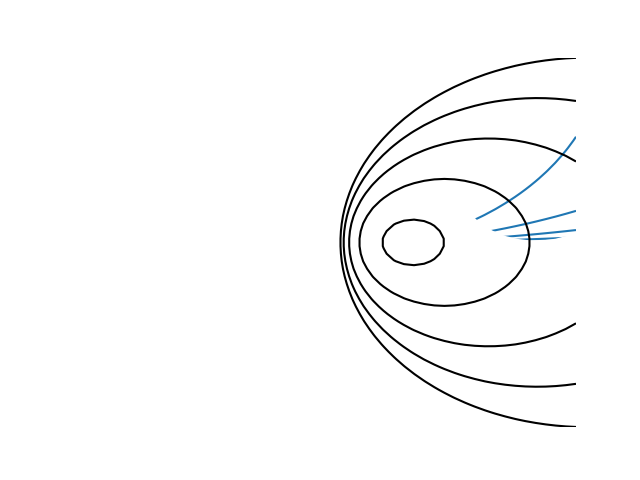

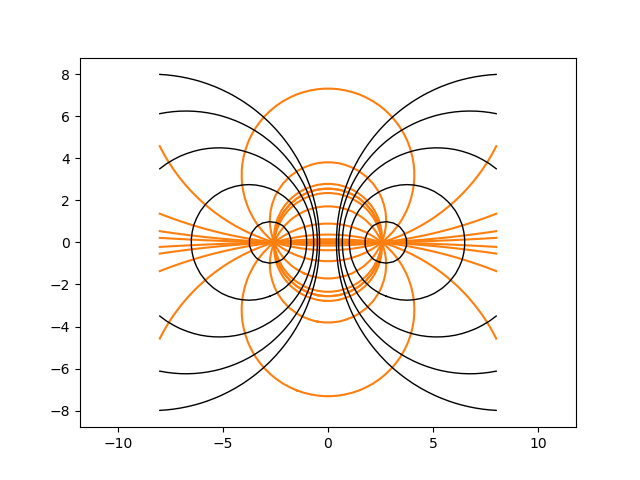

In [274]:
x = np.linspace(-8,8,50)
y = np.linspace(-8,8,50)
X1, Y1 = np.meshgrid(x,y)
a1, a2 = (2,1)
d = 0.5

d1 = a1**2-a2**2+d**2
d2 = a1**2-a2**2-d**2
c = np.sqrt(d2**2-a2**2)
#v=cte
V1 = (X1-d1)**2+Y1**2-(d1**2-c**2)
V2 = (X1-d2)**2+Y1**2-(d2**2-c**2)
niv1 = np.linspace(0,1,1)
niv2 = np.linspace(0,1,1)


circulo2 = patches.Circle((d1,0),radius=a1,fc='none')
circulo1 = patches.Circle((d2,0),radius=a2,color='white',zorder=5)
circulo1b = patches.Circle((d2,0),radius=a2,color='white',zorder=5)

fig,ax = plt.subplots()
fig1,ax1 = plt.subplots()

#isotermas



col1 = cont1.collections[0]
clip_path = col1.get_paths()[0]
#isoflujo
for theta in np.linspace(0.,np.pi,8):
    di = np.sinh(theta)**2
    
    nivc = np.linspace(0,10,1)
    
    Ui1 = X1**2+(Y1-di)**2-(di**2+c**2)
    Ui2 = X1**2+(Y1+di)**2-(di**2+c**2)
    cont_a = ax.contour(X1,Y1,Ui1,levels=nivc,colors='tab:blue')
    cont_b = ax.contour(X1,Y1,Ui2,levels=nivc,colors='tab:orange')
    for conti in cont_a.collections:
        conti.set_clip_path(clip_path,col1.get_transform())
    for conti in cont_b.collections:
        conti.set_clip_path(clip_path,col1.get_transform())
    
    
    for conti in [cont_a,cont_b]:
        p = conti.collections[0].get_paths()[0]
        v = np.copy(p.vertices)
        x2 = v[:,0]
        y2 = v[:,1]
        
        
        condicion1 = (x2-d1)**2+y2**2-(d1**2-c**2)>0
        condicion2 = (x2-d2)**2+y2**2-(d2**2-c**2)<0
        #x2[np.logical_or(condicion1,condicion1)] = 1e3
        #y2[np.logical_or(condicion1,condicion1)] = 1e3
        
        #x2 = np.delete(x2,x2==1e3)
        #y2 = np.delete(y2,y2==1e3)
        
        ax1.plot(x2,y2,color='tab:orange')



for ai in np.linspace(a1/2,a2*8,5):
    di = np.sqrt(c**2+ai**2)
    Vi = (X1-di)**2+Y1**2-(di**2-c**2)
    Uix,Uiy = np.gradient(Vi)
    Ui1 = Uix**2+Uiy**2
    cont = ax.contour(X1,Y1,Vi,colors='black',levels=niv1)
    for conti in [cont]:
        p = conti.collections[0].get_paths()[0]
        v = np.copy(p.vertices)
        x1 = v[:,0]
        y1 = v[:,1]  
        ax1.plot(x1,y1,'k',linewidth=1)
        ax1.plot(-x1,y1,'k',linewidth=1)

    
    
    


#ax1.axis('off')
ax.axis('off')   
ax1.axis('equal')
    
#savetikz('/home/juan/Documents/Ensenanza/latex/apuntes/conduccion1D/Factores de forma/cilindros_excentricos1.tikz')
   
plt.sca(ax1)    

savetikz('/home/juan/Documents/Ensenanza/latex/apuntes/conduccion1D/Factores de forma/cilindros_excentricos4.tikz')
    

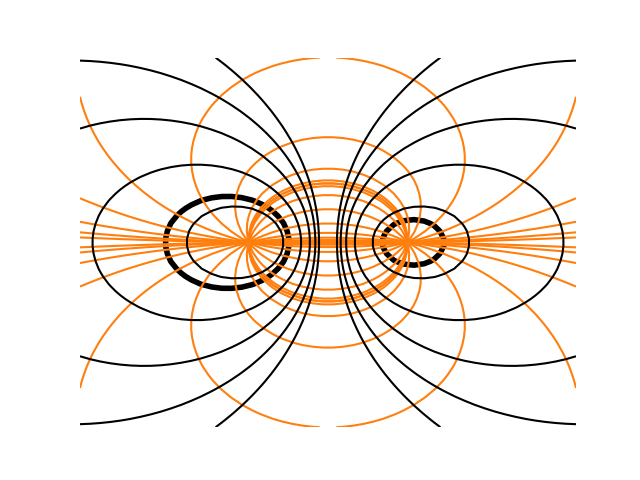

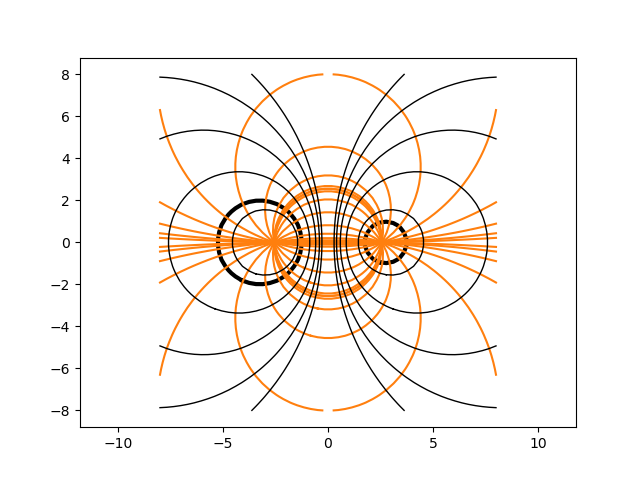

In [309]:
x = np.linspace(-8,8,50)
y = np.linspace(-8,8,50)
X1, Y1 = np.meshgrid(x,y)
a1, a2 = (2,1)
d = 0.5

d1 = -(a1**2-a2**2+d**2)
d2 = a1**2-a2**2-d**2
c = np.sqrt(d2**2-a2**2)
#v=cte
V1 = (X1-d1)**2+Y1**2-(d1**2-c**2)
V2 = (X1-d2)**2+Y1**2-(d2**2-c**2)
niv1 = np.linspace(0,1,1)
niv2 = np.linspace(0,1,1)


circulo2 = patches.Circle((d1,0),radius=a1,fc='none')
circulo1 = patches.Circle((d2,0),radius=a2,color='white',zorder=5)
circulo1b = patches.Circle((d2,0),radius=a2,color='white',zorder=5)

fig,ax = plt.subplots()
fig1,ax1 = plt.subplots()

#isotermas

cont1 = ax.contour(X1,Y1,V1,colors='black',levels=niv1,linewidths=4)
cont2 = ax.contour(X1,Y1,V2,colors='black',levels=niv2,linewidths=4)

for conti in [cont1,cont2]:
    p = conti.collections[0].get_paths()[0]
    v = p.vertices
    x1 = v[:,0]
    y1 = v[:,1]  

    ax1.plot(x1,y1,'k',linewidth=3)


col1 = cont1.collections[0]
clip_path = col1.get_paths()[0]
#isoflujo
for theta in np.linspace(0.,np.pi,10):
    di = np.sinh(theta)**2
    
    nivc = np.linspace(0,10,1)
    
    Ui1 = X1**2+(Y1-di)**2-(di**2+c**2)
    Ui2 = X1**2+(Y1+di)**2-(di**2+c**2)
    cont_a = ax.contour(X1,Y1,Ui1,levels=nivc,colors='tab:orange')
    cont_b = ax.contour(X1,Y1,Ui2,levels=nivc,colors='tab:orange')
    
    
    for conti in [cont_a,cont_b]:
        p = conti.collections[0].get_paths()[0]
        v = np.copy(p.vertices)
        x2 = v[:,0]
        y2 = v[:,1]

        
        ax1.plot(x2,y2,color='tab:orange')



for si in np.linspace(-np.pi,np.pi,20):
    di = np.sinh(si)
    if np.logical_and(np.abs(di)>c,np.abs(di)>d1):    
        #print('hola')
        ai = np.sqrt(-c**2+di**2)
        Vi = (X1-di)**2+Y1**2-(di**2-c**2)
        cont = ax.contour(X1,Y1,Vi,colors='black',levels=niv1)
        for conti in [cont]:
            p = conti.collections[0].get_paths()[0]
            v = np.copy(p.vertices)
            x1 = v[:,0]
            y1 = v[:,1]  
            ax1.plot(x1,y1,'k',linewidth=1)

    
    

#ax1.axis('off')
ax.axis('off')   
ax1.axis('equal')
    
#savetikz('/home/juan/Documents/Ensenanza/latex/apuntes/conduccion1D/Factores de forma/cilindros_excentricos1.tikz')
   
plt.sca(ax1)    
savetikz('/home/juan/Documents/Ensenanza/latex/apuntes/conduccion1D/Factores de forma/cilindros_enfrentados1.tikz')
    

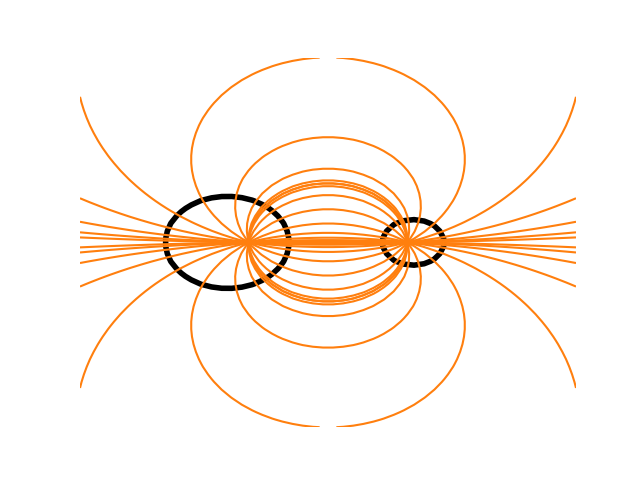

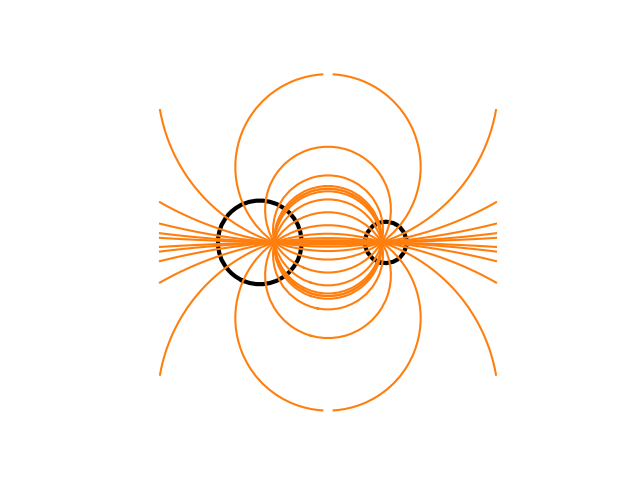

In [310]:
x = np.linspace(-8,8,50)
y = np.linspace(-8,8,50)
X1, Y1 = np.meshgrid(x,y)
a1, a2 = (2,1)
d = 0.5

d1 = -(a1**2-a2**2+d**2)
d2 = a1**2-a2**2-d**2
c = np.sqrt(d2**2-a2**2)
#v=cte
V1 = (X1-d1)**2+Y1**2-(d1**2-c**2)
V2 = (X1-d2)**2+Y1**2-(d2**2-c**2)
niv1 = np.linspace(0,1,1)
niv2 = np.linspace(0,1,1)


circulo2 = patches.Circle((d1,0),radius=a1,fc='none')
circulo1 = patches.Circle((d2,0),radius=a2,color='white',zorder=5)
circulo1b = patches.Circle((d2,0),radius=a2,color='white',zorder=5)

fig,ax = plt.subplots()
fig1,ax1 = plt.subplots()

#isotermas

cont1 = ax.contour(X1,Y1,V1,colors='black',levels=niv1,linewidths=4)
cont2 = ax.contour(X1,Y1,V2,colors='black',levels=niv2,linewidths=4)

for conti in [cont1,cont2]:
    p = conti.collections[0].get_paths()[0]
    v = p.vertices
    x1 = v[:,0]
    y1 = v[:,1]  

    ax1.plot(x1,y1,'k',linewidth=3)


col1 = cont1.collections[0]
clip_path = col1.get_paths()[0]
#isoflujo
for theta in np.linspace(0.,np.pi,10):
    di = np.sinh(theta)**2
    
    nivc = np.linspace(0,10,1)
    
    Ui1 = X1**2+(Y1-di)**2-(di**2+c**2)
    Ui2 = X1**2+(Y1+di)**2-(di**2+c**2)
    cont_a = ax.contour(X1,Y1,Ui1,levels=nivc,colors='tab:orange')
    cont_b = ax.contour(X1,Y1,Ui2,levels=nivc,colors='tab:orange')
    
    
    for conti in [cont_a,cont_b]:
        p = conti.collections[0].get_paths()[0]
        v = np.copy(p.vertices)
        x2 = v[:,0]
        y2 = v[:,1]

        
        ax1.plot(x2,y2,color='tab:orange')





    
    

ax1.axis('off')
ax.axis('off')   
ax1.axis('equal')
    
#savetikz('/home/juan/Documents/Ensenanza/latex/apuntes/conduccion1D/Factores de forma/cilindros_excentricos1.tikz')
   
plt.sca(ax1)    
#savetikz('/home/juan/Documents/Ensenanza/latex/apuntes/conduccion1D/Factores de forma/cilindros_enfrentados2.tikz')
    

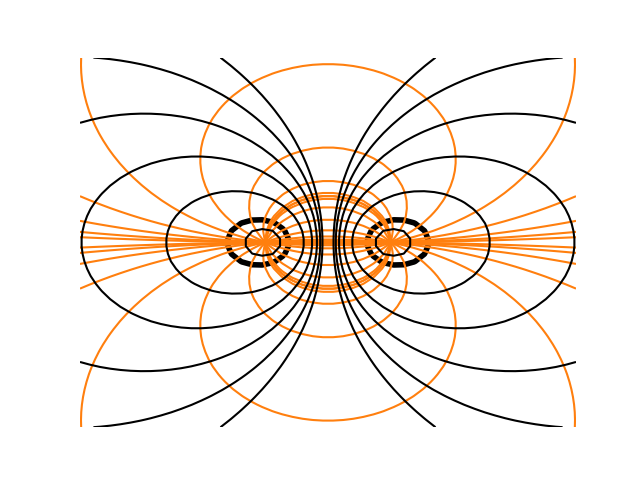

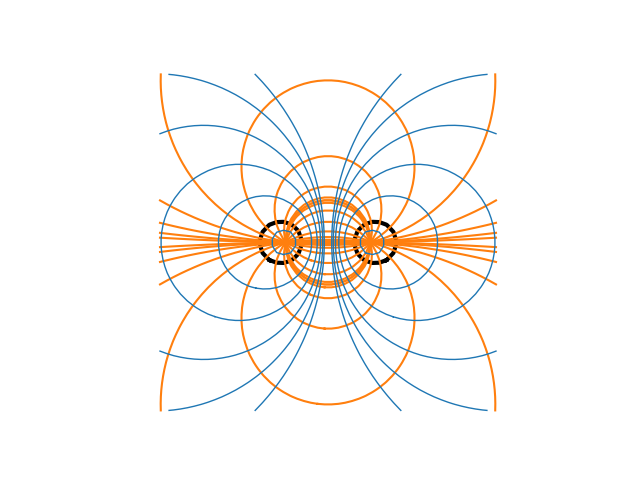

In [320]:
x = np.linspace(-8,8,50)
y = np.linspace(-8,8,50)
X1, Y1 = np.meshgrid(x,y)
a1, a2 = (1,1)
d = 1.5

d1 = -(a1**2-a2**2+d**2)
d2 = a1**2-a2**2-d**2
c = np.sqrt(d2**2-a2**2)
#v=cte
V1 = (X1-d1)**2+Y1**2-(d1**2-c**2)
V2 = (X1-d2)**2+Y1**2-(d2**2-c**2)
niv1 = np.linspace(0,1,1)
niv2 = np.linspace(0,1,1)


circulo2 = patches.Circle((d1,0),radius=a1,fc='none')
circulo1 = patches.Circle((d2,0),radius=a2,color='white',zorder=5)
circulo1b = patches.Circle((d2,0),radius=a2,color='white',zorder=5)

fig,ax = plt.subplots()
fig1,ax1 = plt.subplots()

#isotermas

cont1 = ax.contour(X1,Y1,V1,colors='black',levels=niv1,linewidths=4)
cont2 = ax.contour(-X1,Y1,V2,colors='black',levels=niv2,linewidths=4)

for conti in [cont1,cont2]:
    p = conti.collections[0].get_paths()[0]
    v = p.vertices
    x1 = v[:,0]
    y1 = v[:,1]  

    ax1.plot(x1,y1,'k',linewidth=3)


col1 = cont1.collections[0]
clip_path = col1.get_paths()[0]
#isoflujo
for theta in np.linspace(0.,np.pi,10):
    di = np.sinh(theta)**2
    
    nivc = np.linspace(0,10,1)
    
    Ui1 = X1**2+(Y1-di)**2-(di**2+c**2)
    Ui2 = X1**2+(Y1+di)**2-(di**2+c**2)
    cont_a = ax.contour(X1,Y1,Ui1,levels=nivc,colors='tab:orange')
    cont_b = ax.contour(X1,Y1,Ui2,levels=nivc,colors='tab:orange')
    
    
    for conti in [cont_a,cont_b]:
        p = conti.collections[0].get_paths()[0]
        v = np.copy(p.vertices)
        x2 = v[:,0]
        y2 = v[:,1]

        
        ax1.plot(x2,y2,color='tab:orange')
for si in np.linspace(-np.pi,np.pi,20):
    di = np.sinh(si)
    if np.logical_and(np.abs(di)>c,np.abs(di)>d1):    
        #print('hola')
        ai = np.sqrt(-c**2+di**2)
        Vi = (X1-di)**2+Y1**2-(di**2-c**2)
        cont = ax.contour(X1,Y1,Vi,colors='black',levels=niv1)
        for conti in [cont]:
            p = conti.collections[0].get_paths()[0]
            v = np.copy(p.vertices)
            x1 = v[:,0]
            y1 = v[:,1]  
            ax1.plot(x1,y1,'tab:blue',linewidth=1)

    




    
    

ax1.axis('off')
ax.axis('off')   
ax1.axis('equal')
    
#savetikz('/home/juan/Documents/Ensenanza/latex/apuntes/conduccion1D/Factores de forma/cilindros_excentricos1.tikz')
   
plt.sca(ax1)    
savetikz('/home/juan/Documents/Ensenanza/latex/apuntes/conduccion1D/Factores de forma/cilindros_enfrentados3.tikz')
    

In [314]:
d1,d2

(-0.25, -0.25)